<img style="float: right; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="500px" height="180px" /> 


# <font color= 'navy'> EDA - Desempleo en USA</font>
### <font color= #2E9AFE> Ética para la Ciencia de Datos</font>


- <Strong> José Manuel Haces López - 734759</Strong>


- <Strong> Claudia Celeste Castillejos Jáuregui - 735868 </Strong>


- <Strong> Marcela Quintero Perez - 717644 </Strong>


- <Strong> Pablo Ivan Orosco Beltran - 723252 </Strong>


<Strong> Fecha </Strong>: 2023


<Strong> Link GitHub </Strong>:  https://github.com/JManuelHaces/Proyecto_EticaCD


### <font color= #2E9AFE> Apéndice </font>

- Portada.
- Introducción.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Conclusiones.

### <font color= #2E9AFE>1. Introducción </font>

La desempleo es un factor muy importante para el desarrollo de la economia de un pais.Este da por un desajuste en el mercado laboral, donde la oferta de trabajo (por parte de los trabajadores) es superior a la demanda de trabajo (por parte de las empresas). Por lo tanto decidimos analizar la taza de desempelo que se va tratado en USA.

### <font color= #2E9AFE>2. Descripción de la base de datos </font>

Este conjunto de datos contiene datos de series temporales de la tasa de desempleo en EE. UU. desde enero de 2010 hasta el presente. Contiene registros de la tasa de desempleo basados en la calificación educativa, la raza y el género de los adultos.

Este conjunto de datos también contiene datos de la tasa de desempleo por estado para el año 2020.

El conjunto de datos está limpio y no requiere mucho procesamiento previo. El periodo de tiempo de los datos es del 2000 al 2020.

Dentro de los datos encontramos variables protegidas como Edad y Género.

La base de datos fue recuperada de kaggle: https://www.kaggle.com/datasets/aniruddhasshirahatti/us-unemployment-dataset-2010-2020?select=unemployment_data_us.csv


Variables que contiene el dataset:

 - Date
 - Primary_School
 - High_School
 - Associates_Degree 
 - Professional_Degree
 - White
 - Black
 - Asian
 - Hispanic
 - Men
 - Women

Nota: Las variables guardan datos de tiempo y númericos.

### <font color= #2E9AFE>3. Objetivos </font>

 * Conocer la tendencia en el desempleo a lo largo del periodo temporal.
 * Ingresos de una persona en el momento (promedio y medianas).
 * Acceso o no acceso a equipos de cómputo de las personas.
 * Analizar el desempleo segregando por grupos (sociales, genero, raza, etc.)


In [1]:
# Librerías
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# Filtrando warnings
warnings.filterwarnings('ignore')

# Utilidades
import Utils
from Utils import VariableAnalysis

### <font color= #2E9AFE>Carga de Datos</font>

In [2]:
# Cargando lso datos
unemployemnt_data_usa = pd.read_excel('./Data/Procesado/Desempleo_Por_Grupo.xlsx')

# Mostrando los datos
unemployemnt_data_usa.head()

,Fecha,Escuela_Primaria,Preparatoria,Tecnico,Profesional,Blanco,Negro,Asiatico,Hispano,Hombre,Mujer
0,2010-01-01,15.3,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
1,2010-02-01,15.8,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0
2,2010-03-01,14.9,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1
3,2010-04-01,14.7,10.8,8.4,4.8,9.0,16.6,7.0,12.5,10.2,8.3
4,2010-05-01,14.6,10.9,8.2,4.6,8.7,15.5,7.8,12.0,9.7,8.1


### <font color= #2E9AFE>4. Desarrollo</font>
### <font color= #2E9AFE> EDA </font>

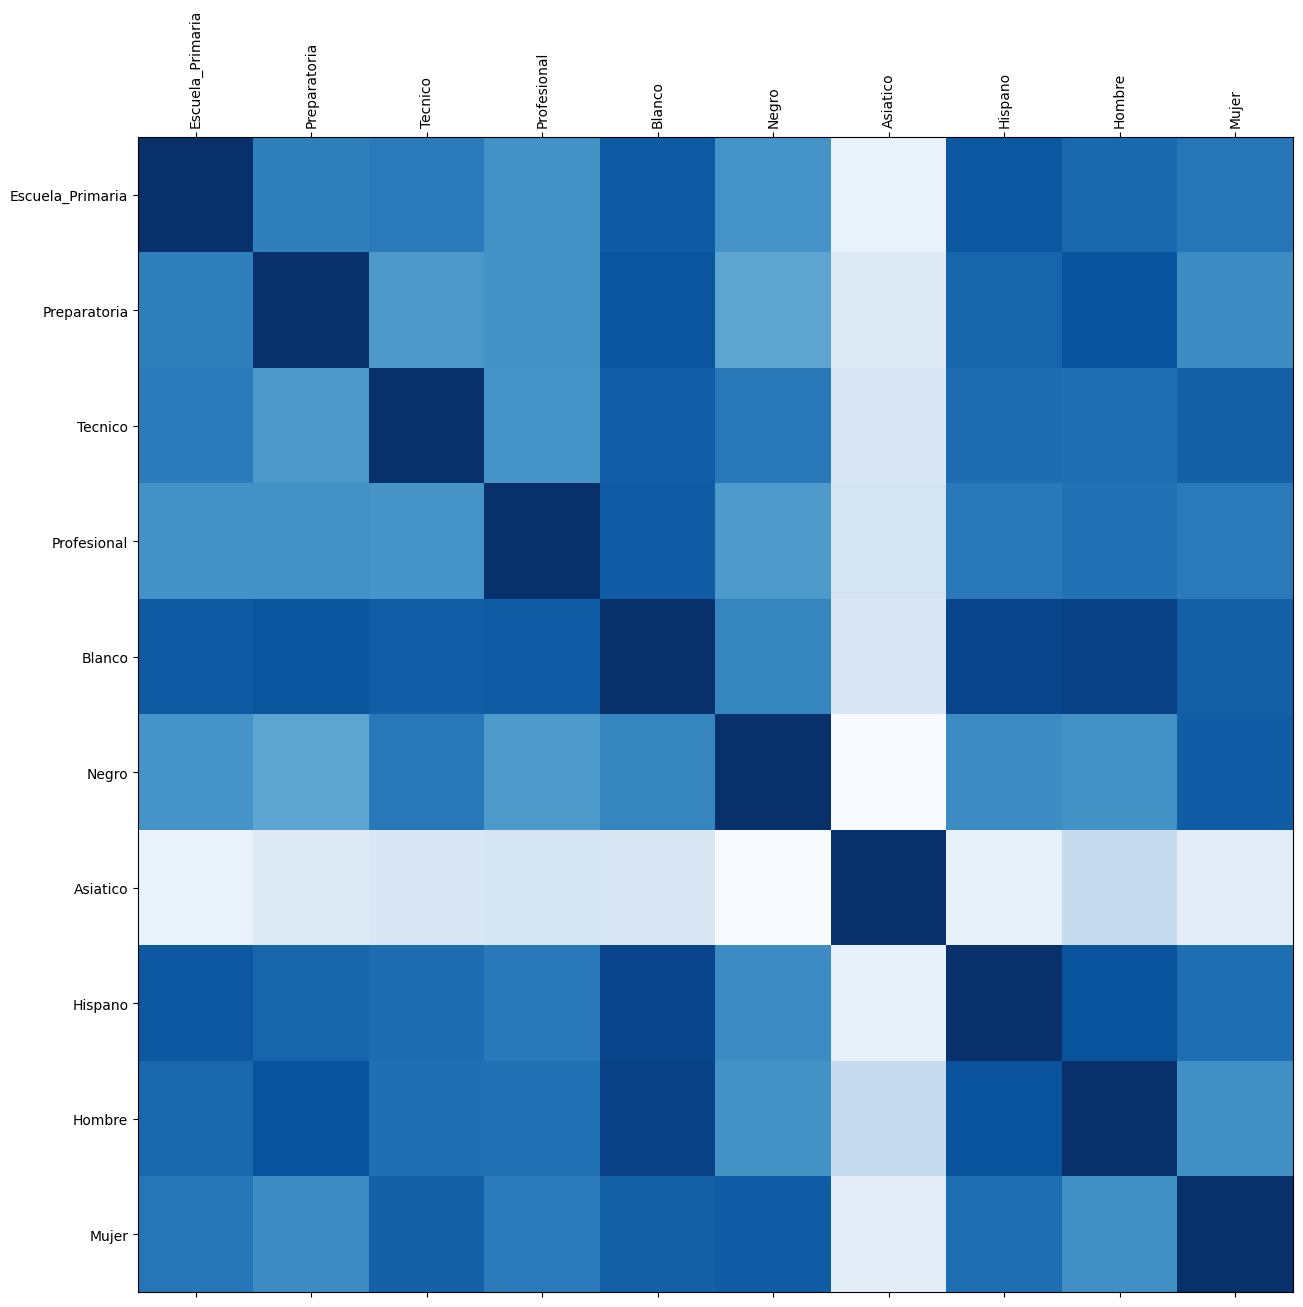

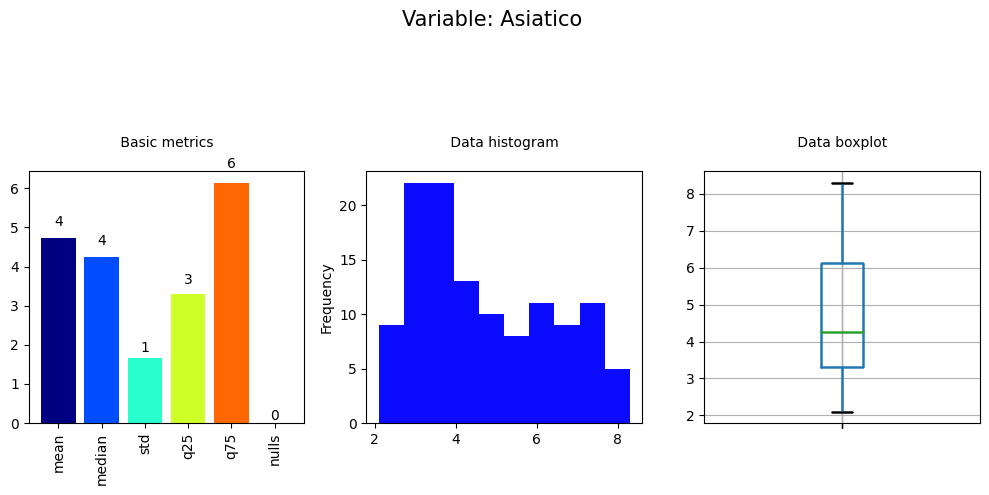

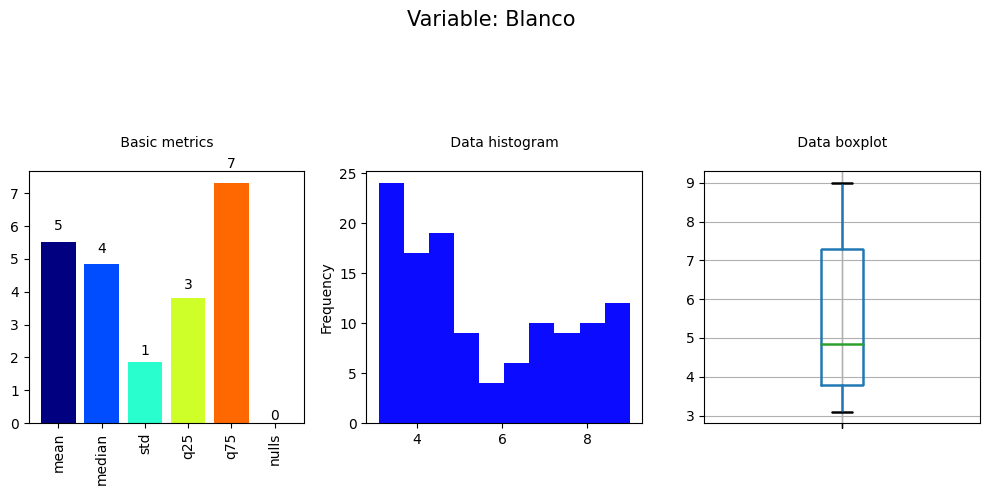

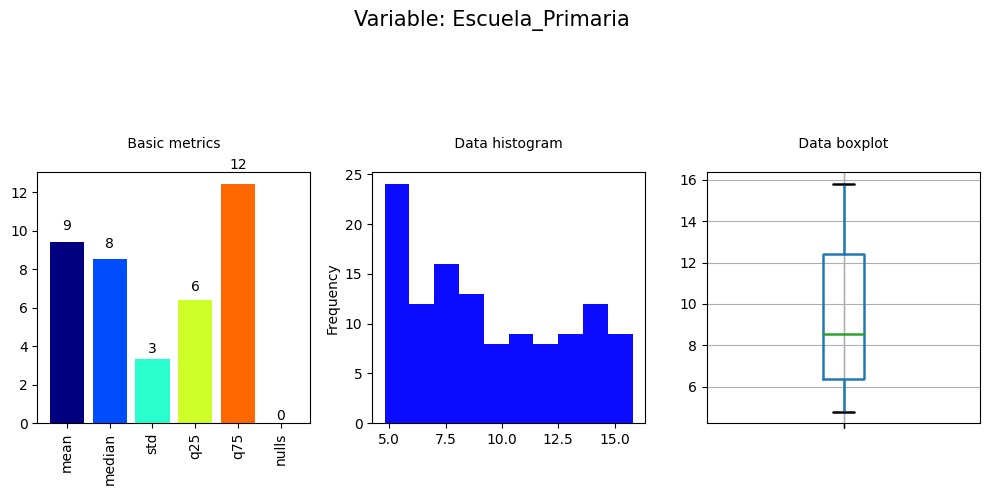

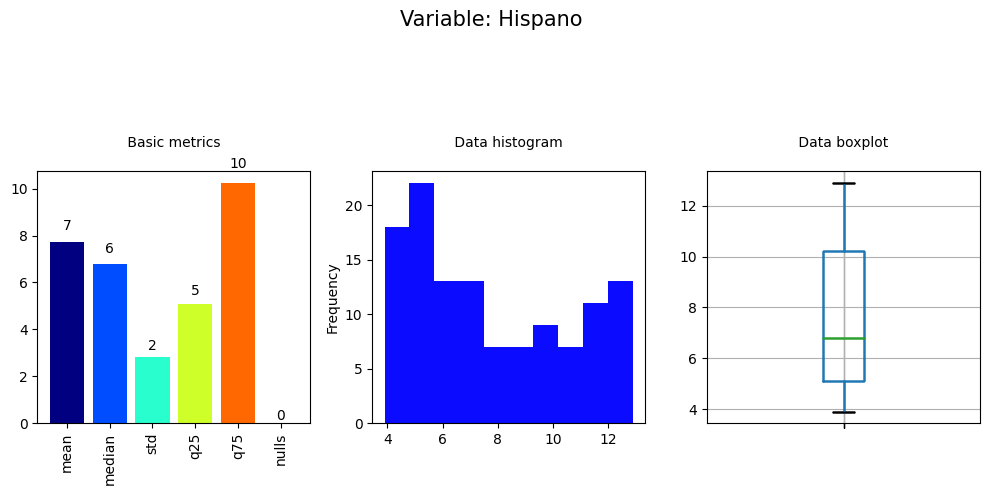

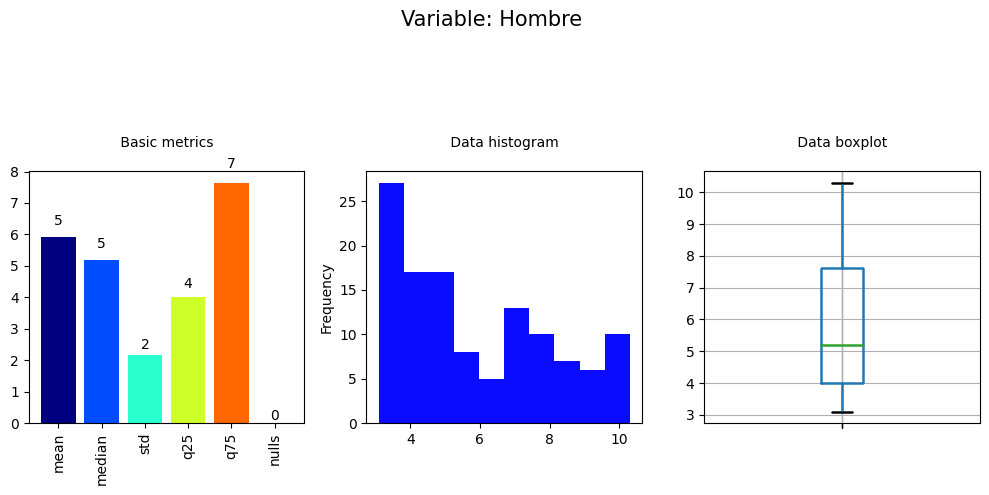

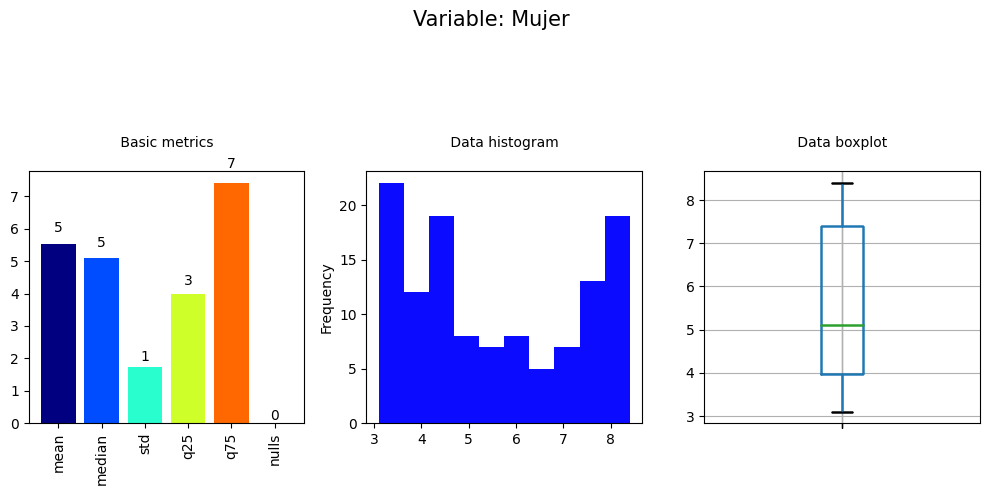

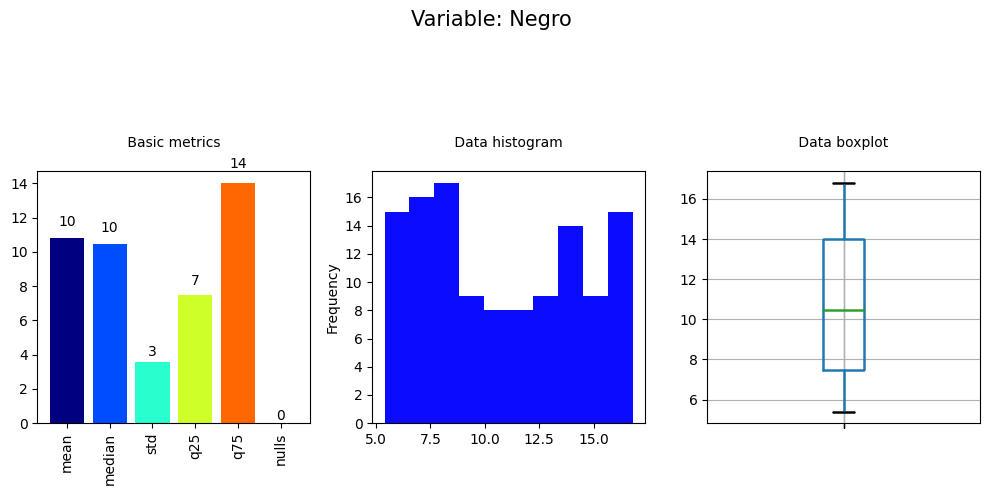

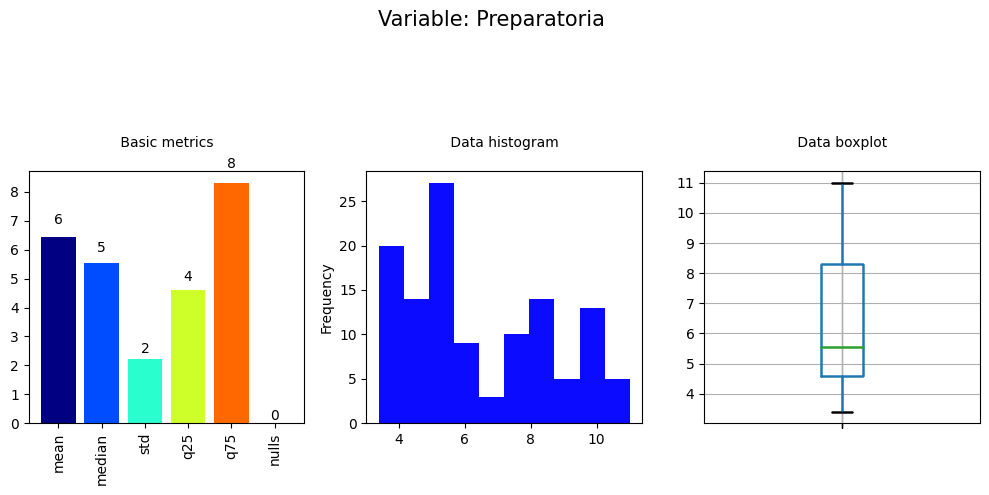

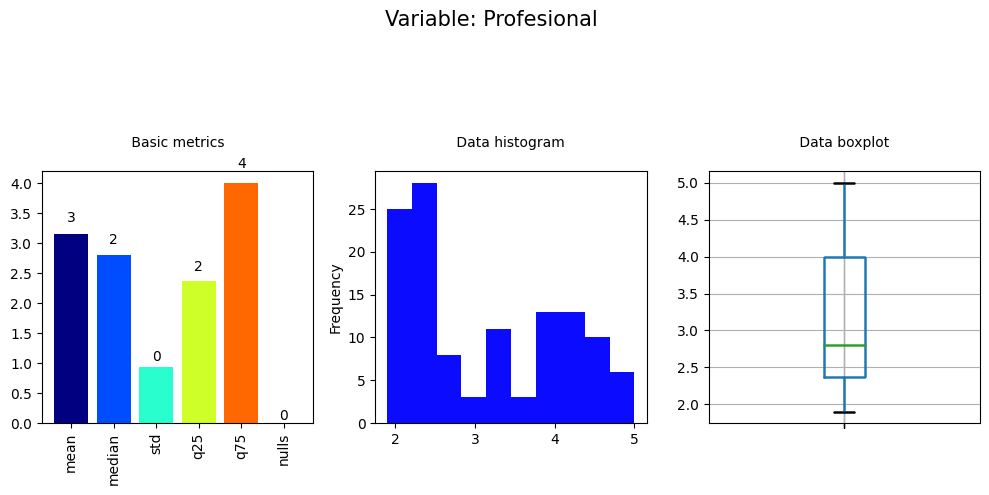

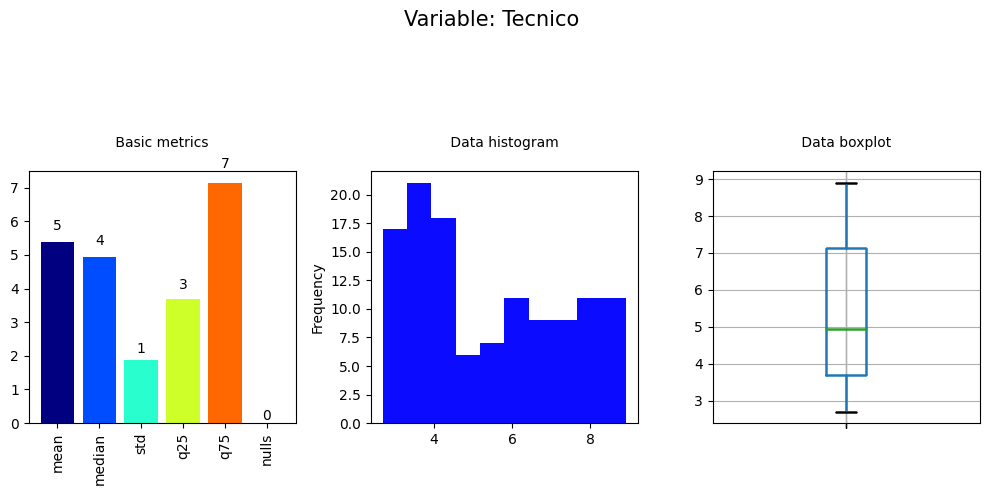

In [3]:
# Análisis Descriptivo
v_analysis = VariableAnalysis(df=unemployemnt_data_usa, pattern=[])
# Obteniendo los estadísticos
numeric_stats, object_stats, cleaned_df = v_analysis.fit_transform()
# Mostrando los estadísticos
v_analysis.plot_numeric(df=unemployemnt_data_usa, numeric_stats=numeric_stats)
# Mostrando los estadísticos
v_analysis.plot_categorical(df=unemployemnt_data_usa, object_stats=object_stats)

### Análisis Descriptivo

In [4]:
#Verificamos que no existan columnas con datos nulos
unemployemnt_data_usa.isnull().sum()

Fecha               0
Escuela_Primaria    0
Preparatoria        0
Tecnico             0
Profesional         0
Blanco              0
Negro               0
Asiatico            0
Hispano             0
Hombre              0
Mujer               0
dtype: int64

In [5]:
#Sesgo
Utils.skewness(unemployemnt_data_usa)

,value,skewness
Escuela_Primaria,0.38,Symmetric distribution
Preparatoria,0.46,Symmetric distribution
Tecnico,0.33,Symmetric distribution
Profesional,0.37,Symmetric distribution
Blanco,0.41,Symmetric distribution
Negro,0.15,Symmetric distribution
Asiatico,0.45,Symmetric distribution
Hispano,0.40,Symmetric distribution
Hombre,0.50,Symmetric distribution
Mujer,0.21,Symmetric distribution


In [6]:
#Hacemos la fecha index por mes con el promedio 
unemployemnt_data_usa2 = unemployemnt_data_usa.set_index('Fecha').resample('M').mean()
unemployemnt_data_usa2.head()

,Escuela_Primaria,Preparatoria,Tecnico,Profesional,Blanco,Negro,Asiatico,Hispano,Hombre,Mujer
Fecha,,,,,,,,,,
2010-01-31,15.3,10.2,8.6,4.9,8.8,16.5,8.3,12.9,10.2,7.9
2010-02-28,15.8,10.7,8.1,4.9,8.9,16.1,8.2,12.7,10.3,8.0
2010-03-31,14.9,11.0,8.4,4.9,8.9,16.8,7.6,12.9,10.2,8.1
2010-04-30,14.7,10.8,8.4,4.8,9.0,16.6,7.0,12.5,10.2,8.3
2010-05-31,14.6,10.9,8.2,4.6,8.7,15.5,7.8,12.0,9.7,8.1


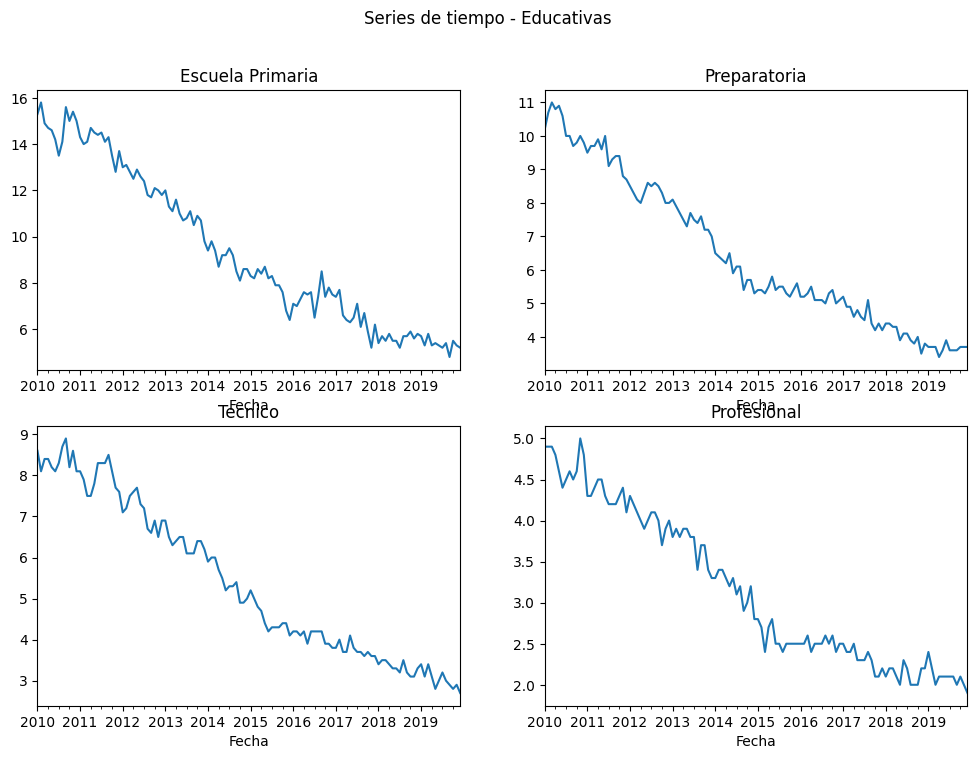

In [7]:
# Graficos series de tiempo - educativas
plt.subplot(2, 2, 1)
unemployemnt_data_usa2['Escuela_Primaria'].plot(figsize=(12, 8)) # ir significa círculo verde, punto verde# ir significa círculo verde, punto verde
# Establecer el título de la subimagen
plt.title("Escuela Primaria")

plt.subplot(2, 2, 2)
unemployemnt_data_usa2['Preparatoria'].plot(figsize=(12, 8)) 
plt.title("Preparatoria")
plt.subplot(2, 2, 3)
unemployemnt_data_usa2['Tecnico'].plot(figsize=(12, 8)) 
plt.title("Tecnico")

plt.subplot(2, 2, 4)
unemployemnt_data_usa2['Profesional'].plot(figsize=(12, 8))
plt.title("Profesional")


# Establecer título
plt.suptitle("Series de tiempo - Educativas")

# Mostrar
plt.show()

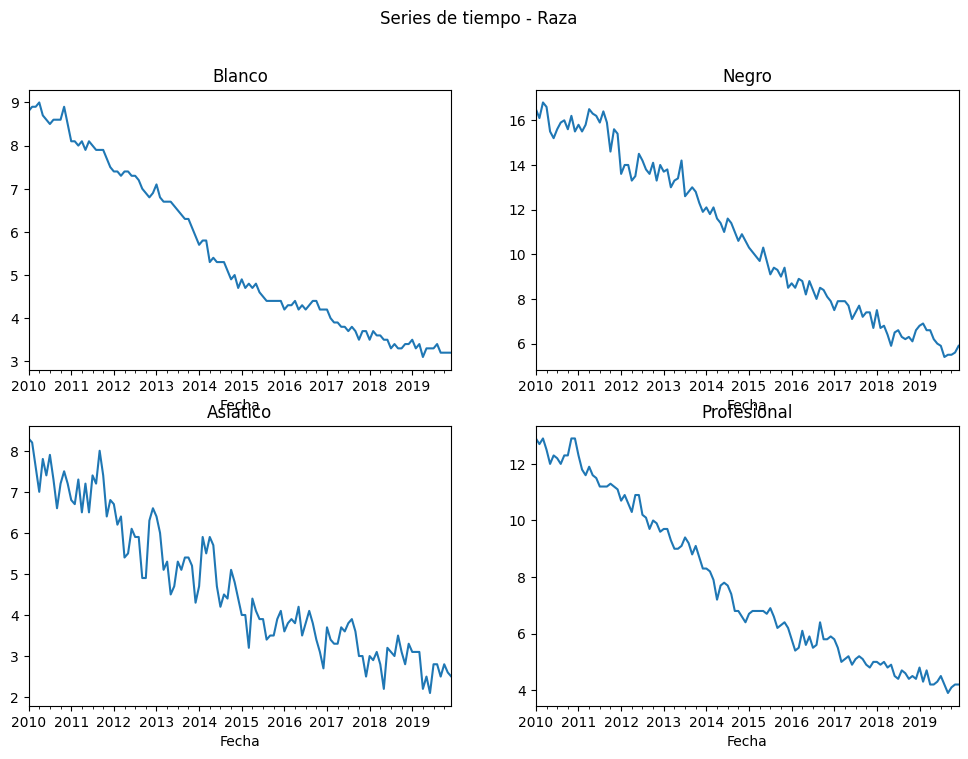

In [8]:

plt.subplot(2, 2, 1)
unemployemnt_data_usa2['Blanco'].plot(figsize=(12, 8)) 
plt.title("Blanco")

plt.subplot(2, 2, 2)
unemployemnt_data_usa2['Negro'].plot(figsize=(12, 8)) 
plt.title("Negro")
plt.subplot(2, 2, 3)
unemployemnt_data_usa2['Asiatico'].plot(figsize=(12, 8)) 
plt.title("Asiatico")

plt.subplot(2, 2, 4)
unemployemnt_data_usa2['Hispano'].plot(figsize=(12, 8))
plt.title("Profesional")


# Establecer título
plt.suptitle("Series de tiempo - Raza")

# Mostrar
plt.show()

Text(0.5, 0.98, 'Series de tiempo - Género')

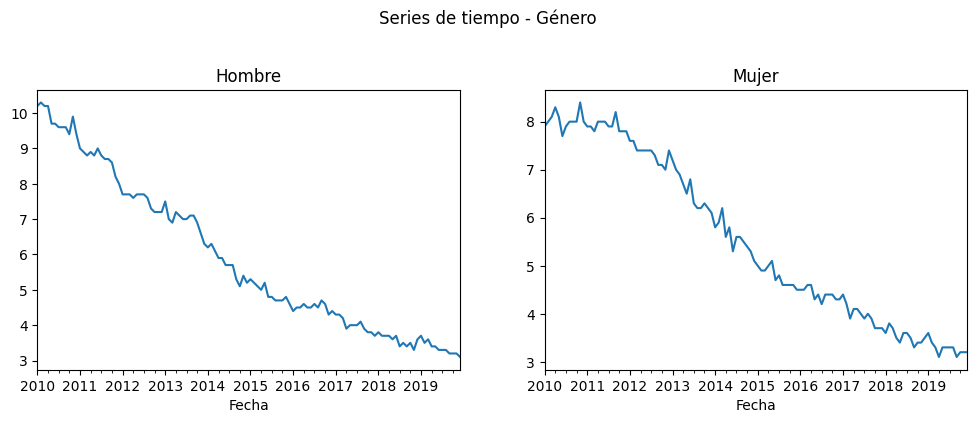

In [9]:

plt.subplot(2, 2, 1)
unemployemnt_data_usa2['Hombre'].plot(figsize=(12, 8)) 
plt.title("Hombre")

plt.subplot(2, 2, 2)
unemployemnt_data_usa2['Mujer'].plot(figsize=(12, 8)) 
plt.title("Mujer")



# Establecer título
plt.suptitle("Series de tiempo - Género")

#### <font color= #2E9AFE>Histográma por Grupo Social</font>

array([[<Axes: title={'center': 'Blanco'}>]], dtype=object)

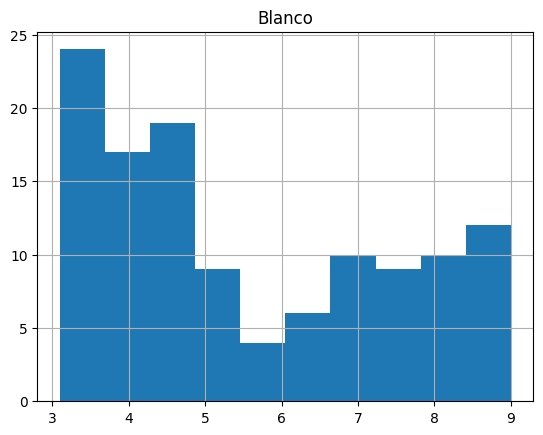

In [10]:
unemployemnt_data_usa[['Blanco']].hist()

array([[<Axes: title={'center': 'Negro'}>]], dtype=object)

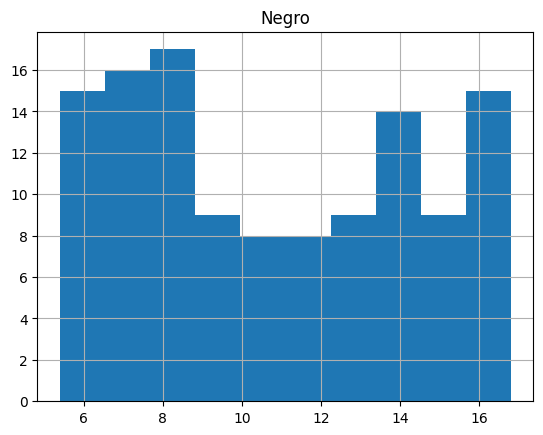

In [11]:
unemployemnt_data_usa[['Negro']].hist()

array([[<Axes: title={'center': 'Hispano'}>]], dtype=object)

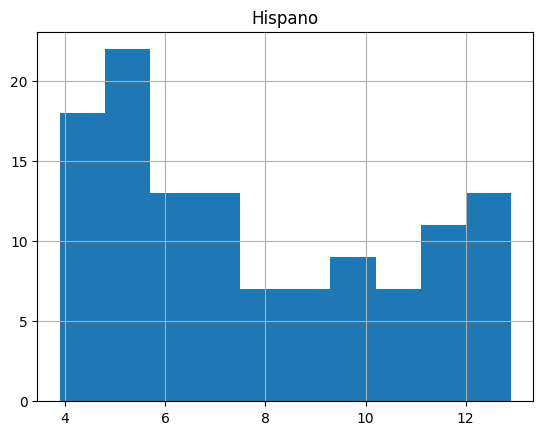

In [12]:
unemployemnt_data_usa[['Hispano']].hist()

array([[<Axes: title={'center': 'Hombre'}>]], dtype=object)

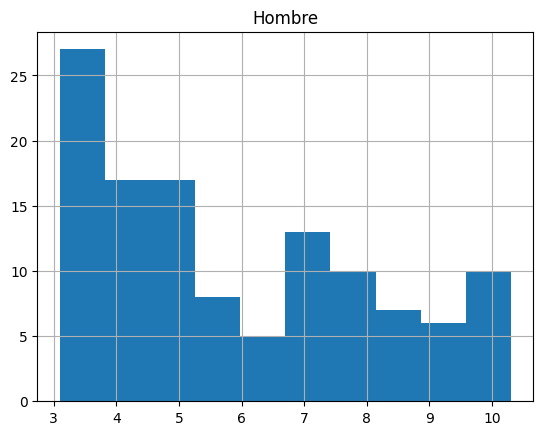

In [13]:
unemployemnt_data_usa[['Hombre']].hist()

array([[<Axes: title={'center': 'Mujer'}>]], dtype=object)

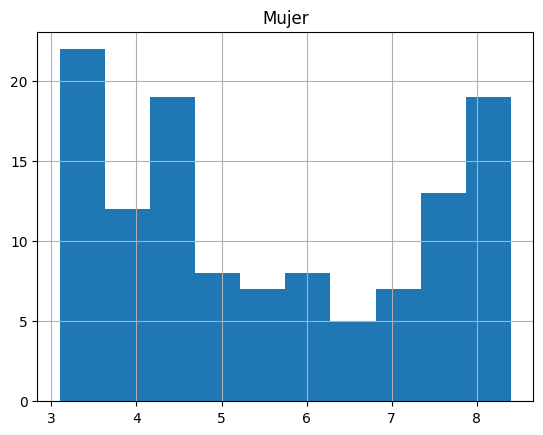

In [14]:
unemployemnt_data_usa[['Mujer']].hist()